# Df 0 1 9_ Cache
This tutorial shows how the content of a data frame can be cached in memory
in form of a data frame. The content of the columns is stored in memory in
contiguous slabs of memory and is "ready to use", i.e. no ROOT IO operation
is performed.

Creating a cached data frame storing all of its content deserialised and uncompressed
in memory is particularly useful when dealing with datasets of a moderate size
(small enough to fit the RAM) over which several explorative loops need to be
performed at as fast as possible. In addition, caching can be useful when no file
on disk needs to be created as a side effect of checkpointing part of the analysis.

All steps in the caching are lazy, i.e. the cached data frame is actually filled
only when the event loop is triggered on it.




**Author:** Danilo Piparo  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:09 AM.</small></i>

We create a data frame on top of the hsimple example

In [1]:
auto hsimplePath = gROOT->GetTutorialDir();
hsimplePath += "/hsimple.root";
ROOT::RDataFrame df("ntuple", hsimplePath.Data());

We apply a simple cut and define a new column

In [2]:
auto df_cut = df.Filter([](float py) { return py > 0.f; }, {"py"})
                 .Define("px_plus_py", [](float px, float py) { return px + py; }, {"px", "py"});

We cache the content of the dataset. nothing has happened yet: the work to accomplish
 has been described. As for `Snapshot`, the types and columns can be written out explicitly
 or left for the jitting to handle (`df_cached` is intentionally unused - it shows how to
 to create a *cached* data frame specifying column types explicitly):

In [3]:
auto df_cached = df_cut.Cache<float, float>({"px_plus_py", "py"});
auto df_cached_implicit = df_cut.Cache();
auto h = df_cached_implicit.Histo1D<float>("px_plus_py");

Now the event loop on the cached dataset is triggered. this event triggers the loop
 on the `df` data frame lazily.

In [4]:
h->DrawCopy();

Draw all canvases 

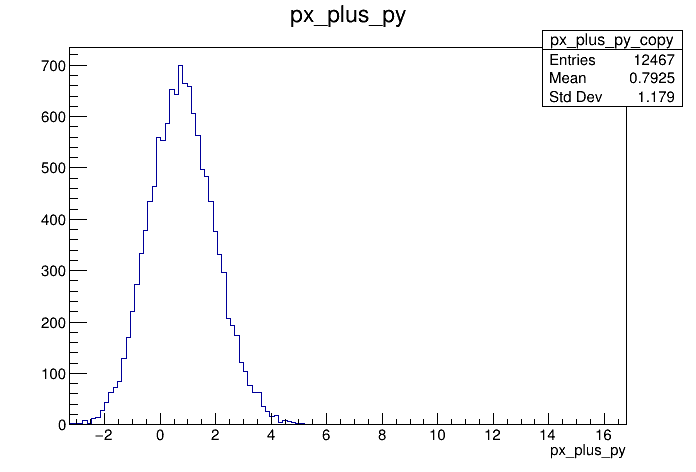

In [5]:
gROOT->GetListOfCanvases()->Draw()